In [1304]:
import pandas as pd
import numpy as np
import datetime

In [1305]:
pd.set_option('display.max_columns', None)

In [1306]:
df = pd.read_csv('finalTrain.csv')

In [1307]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [1308]:
df.drop(columns=['ID','Delivery_person_ID'], axis=1, inplace=True)

In [1309]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1310]:
### There are missing values in data

In [1311]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '9:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '8:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '9:45', '8:40',
       '0.958333333', '17:25', nan, '19:45', '19:10', '10:55', '21:40',
       '0.791666667', '16:45', '11:30', '15:10', '22:45', '22:10',
       '20:45', '22:50', '17:55', '9:25', '20:15', '22:25', '22:40',
       '23:50', '15:25', '10:20', '20:55', '10:40', '15:55', '20:10',
       '12:10', '15:30', '10:35', '21:10', '20:50', '12:35', '0.875',
       '23:40', '18:15', '18:20', '11:45', '12:45', '23:30', '10:50',
       '21:25', '10:10', '17:50', '22:20', '12:40', '23:55', '10:25',
       '8:45', '23:45', '19:55', '22:15', '23:10', '9:15', '18:25',
       '18:45', '16:50', '1', '14:20', '10:15', '8:50', '0.375', '17:45',
       '16:35', '8:30', '21:45', '19:40', '14:50', '18:10', '12:20',
       '12:50', '9:

In [1312]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1313]:
df['Time_Orderd'].dtypes

dtype('O')

In [1314]:
import time

In [1315]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '9:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '8:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '9:45', '8:40',
       '0.958333333', '17:25', nan, '19:45', '19:10', '10:55', '21:40',
       '0.791666667', '16:45', '11:30', '15:10', '22:45', '22:10',
       '20:45', '22:50', '17:55', '9:25', '20:15', '22:25', '22:40',
       '23:50', '15:25', '10:20', '20:55', '10:40', '15:55', '20:10',
       '12:10', '15:30', '10:35', '21:10', '20:50', '12:35', '0.875',
       '23:40', '18:15', '18:20', '11:45', '12:45', '23:30', '10:50',
       '21:25', '10:10', '17:50', '22:20', '12:40', '23:55', '10:25',
       '8:45', '23:45', '19:55', '22:15', '23:10', '9:15', '18:25',
       '18:45', '16:50', '1', '14:20', '10:15', '8:50', '0.375', '17:45',
       '16:35', '8:30', '21:45', '19:40', '14:50', '18:10', '12:20',
       '12:50', '9:

In [1316]:
df['Time_Orderd'].dtype

dtype('O')

In [1317]:
df['Time_Orderd'].isnull().sum()

1731

In [1318]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1319]:
import datetime
c=[]
for i in df['Time_Orderd']:
  try:
    datetime_object = datetime.datetime.strptime(i, "%H:%M")
    a = datetime_object.time()
    b = a.strftime("%H:%M")
    c.append(b)
  except:
    c.append(1)
    
print(c)
df['Time_Orderd']=c

['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '14:55', '20:30', '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25', '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '22:35', '23:25', '13:35', '21:35', '22:35', '18:55', '14:15', 1, '09:45', '08:40', 1, '17:25', 1, '19:45', '19:10', '10:55', '21:40', 1, '16:45', '11:30', '15:10', '22:45', '22:10', '20:45', '22:50', '17:55', '22:45', '20:35', '09:25', '20:15', '22:25', '21:55', '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55', '20:10', '12:10', '15:30', '22:10', '10:35', 1, '23:50', '21:10', '20:25', '20:50', '12:35', 1, '23:40', '18:15', '18:20', '11:45', '20:45', '21:55', '12:45', '23:30', '10:50', '21:25', '10:10', 1, '08:40', '17:50', '20:25', '22:20', '23:40', '23:25', '12:40', '23:30', '23:55', '22:50', '10:25', '08:45', '21:25', '22:35', '20:10', '10:55', '20:35', '23:20', '10:35', '23:45', '19:55', '22:15', '23:10', '09:15', '18:25', '22:10', '20:50', 1, '18:45', '14:55', '16:50', '22:20', 1, 

In [1320]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', 1, '09:45', '08:40', '17:25',
       '19:45', '19:10', '10:55', '21:40', '16:45', '11:30', '15:10',
       '22:45', '22:10', '20:45', '22:50', '17:55', '09:25', '20:15',
       '22:25', '22:40', '23:50', '15:25', '10:20', '20:55', '10:40',
       '15:55', '20:10', '12:10', '15:30', '10:35', '21:10', '20:50',
       '12:35', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '14:20', '10:15', '08:50', '17:45',
       '16:35', '08:30', '21:45', '19:40', '14:50', '18:10', '12:20',
       '12:50', '09:10', '12:30', '17:10', '19:15', '17:20', '18:30',
       '13:10', '

In [1321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Order_Date                   45584 non-null  object 
 7   Time_Orderd                  45584 non-null  object 
 8   Time_Order_picked            45584 non-null  object 
 9   Weather_conditions           44968 non-null  object 
 10  Road_traffic_density         44983 non-null  object 
 11  Vehicle_condition            45584 non-null  int64  
 12  Type_of_order                45584 non-null  object 
 13  Type_of_vehicle 

In [1322]:
c=[]
for i in df['Time_Order_picked']:
  try:
    datetime_object = datetime.datetime.strptime(i, "%H:%M")
    a = datetime_object.time()
    b = a.strftime("%H:%M")
    c.append(b)
  except:
    c.append(1)
    
print(c)
df['Time_Order_picked']=c

['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10', '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45', '12:30', '18:50', '20:40', '23:30', '21:35', '23:45', '22:50', '22:40', '23:35', '13:40', '21:45', '22:45', '19:10', '14:25', '11:10', '09:55', '08:55', '23:10', '17:30', '18:35', '19:50', '19:25', 1, '21:45', '19:15', '16:55', '11:40', '15:15', '22:55', '22:25', '20:55', '23:05', 1, 1, '20:50', '09:40', '20:20', '22:35', 1, '22:55', '23:55', '15:40', '10:30', 1, '10:50', '16:05', '20:15', '12:15', '15:45', '22:15', '10:45', '15:30', 1, '21:25', '20:40', 1, '12:45', '21:15', '23:55', '18:20', '18:25', '11:50', '20:55', '22:10', '12:50', '23:45', '10:55', '21:40', '10:20', '23:05', '08:55', '17:55', '20:40', '22:25', '23:50', '23:30', '12:55', '23:45', 1, 1, '10:40', 1, '21:40', '22:40', '20:20', '11:10', '20:45', '23:35', '10:50', '23:50', 1, '22:25', '23:15', '09:30', '18:35', '22:20', '21:05', '18:25', '18:50', '15:05', 1, '22:35', 1, '21:20', '23:35', '23:35

In [1323]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25', 1, '19:15',
       '16:55', '11:40', '15:15', '22:55', '22:25', '20:55', '23:05',
       '09:40', '20:20', '22:35', '23:55', '15:40', '10:30', '10:50',
       '16:05', '20:15', '12:15', '15:45', '22:15', '10:45', '15:30',
       '21:25', '12:45', '21:15', '18:20', '18:25', '11:50', '12:50',
       '10:55', '21:40', '10:20', '17:55', '23:50', '12:55', '10:40',
       '20:45', '23:15', '22:20', '21:05', '21:20', '14:35', '10:25',
       '09:05', '16:50', '08:40', '23:40', '21:50', '19:55', '10:35',
       '09:25', '17:20', '19:30', '17:25', '20:10', '17:35', '19:05',
       '13:20', '17:50', '18:05', '19:20', '10:05', '09:10', '21:55',
       '19:40', '

In [1324]:
df['Order_Date']=df['Order_Date'].str.replace("/","-")

In [1325]:
df['Order_Date'].unique()

array(['12-2-2022', '13-02-2022', '4-3-2022', '14-02-2022', '2-4-2022',
       '1-3-2022', '16-03-2022', '20-03-2022', '15-02-2022', '10-3-2022',
       '11-3-2022', '27-03-2022', '26-03-2022', '5-4-2022', '12-3-2022',
       '1-4-2022', '5-3-2022', '11-2-2022', '8-3-2022', '3-4-2022',
       '30-03-2022', '28-03-2022', '18-03-2022', '14-03-2022', '6-4-2022',
       '4-4-2022', '24-03-2022', '19-03-2022', '9-3-2022', '25-03-2022',
       '2-3-2022', '13-03-2022', '29-03-2022', '31-03-2022', '17-03-2022',
       '7-3-2022', '15-03-2022', '16-02-2022', '3-3-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '6-3-2022', '21-03-2022'], dtype=object)

In [1326]:
c = []

for i in df['Order_Date']:
    datetime_object = datetime.datetime.strptime(i, "%d-%m-%Y")
    a = datetime_object.date()
    b = a.strftime("%Y-%m-%d")
    c.append(b)

print(c)
df['Order_Date']=c

['2022-02-12', '2022-02-13', '2022-03-04', '2022-02-13', '2022-02-14', '2022-04-02', '2022-03-01', '2022-03-16', '2022-03-20', '2022-02-15', '2022-03-16', '2022-03-10', '2022-03-11', '2022-03-27', '2022-03-26', '2022-03-27', '2022-04-05', '2022-03-12', '2022-03-16', '2022-04-02', '2022-04-01', '2022-03-05', '2022-02-11', '2022-02-11', '2022-03-08', '2022-04-02', '2022-03-08', '2022-04-03', '2022-03-30', '2022-04-01', '2022-03-28', '2022-03-18', '2022-03-14', '2022-04-06', '2022-04-04', '2022-03-08', '2022-02-13', '2022-03-24', '2022-03-19', '2022-03-09', '2022-03-19', '2022-04-03', '2022-03-25', '2022-02-13', '2022-04-04', '2022-03-26', '2022-03-10', '2022-02-14', '2022-03-02', '2022-03-26', '2022-03-13', '2022-03-29', '2022-03-30', '2022-03-12', '2022-03-31', '2022-03-17', '2022-02-15', '2022-02-15', '2022-03-07', '2022-03-28', '2022-03-16', '2022-03-17', '2022-03-15', '2022-03-25', '2022-03-09', '2022-03-11', '2022-03-05', '2022-02-11', '2022-03-12', '2022-03-29', '2022-03-19', '2022

In [1327]:
df['Order_Date'].unique()

array(['2022-02-12', '2022-02-13', '2022-03-04', '2022-02-14',
       '2022-04-02', '2022-03-01', '2022-03-16', '2022-03-20',
       '2022-02-15', '2022-03-10', '2022-03-11', '2022-03-27',
       '2022-03-26', '2022-04-05', '2022-03-12', '2022-04-01',
       '2022-03-05', '2022-02-11', '2022-03-08', '2022-04-03',
       '2022-03-30', '2022-03-28', '2022-03-18', '2022-03-14',
       '2022-04-06', '2022-04-04', '2022-03-24', '2022-03-19',
       '2022-03-09', '2022-03-25', '2022-03-02', '2022-03-13',
       '2022-03-29', '2022-03-31', '2022-03-17', '2022-03-07',
       '2022-03-15', '2022-02-16', '2022-03-03', '2022-02-18',
       '2022-03-23', '2022-02-17', '2022-03-06', '2022-03-21'],
      dtype=object)

In [1328]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1329]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [1330]:
#This column has null values
#Weather_conditions
#Road_traffic_density
#Festival
#City


In [1331]:
df["Weather_conditions"].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [1332]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1333]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [1334]:
import ast

c=[]

for i in df['Road_traffic_density']:
    try:
        a=ast.literal_eval(i)
        c.append(a)
    except:
        pass
print(c)

[]


In [1335]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [1336]:
d=[]
for i in df['Weather_conditions']:
    if type(i)==float:
        d.append('unknown')
    elif type(i)==str:
        d.append(i)
    else:
        print(type(i))
        d.append(i)
df['Weather_conditions']=d

In [1337]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny',
       'unknown'], dtype=object)

In [1338]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

In [1339]:
d=[]
for i in df['Road_traffic_density']:
    if type(i)==float:
        d.append('unknown')
    elif type(i)==str:
        d.append(i)
    else:
        print(type(i))
        d.append(i)
df['Road_traffic_density']=d

In [1340]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low', 'unknown'], dtype=object)

In [1341]:
df['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1342]:
d=[]
for i in df['Festival']:
    if type(i)==float:
        d.append('unknown')
    elif type(i)==str:
        d.append(i)
    else:
        print(type(i))
        d.append(i)
df['Festival']=d

In [1343]:
df['Festival'].unique()

array(['No', 'Yes', 'unknown'], dtype=object)

In [1344]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [1345]:
d=[]
for i in df['City']:
    if type(i)==float:
        d.append('unknown')
    elif type(i)==str:
        d.append(i)
    else:
        print(type(i))
        d.append(i)
df['City']=d

In [1346]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', 'unknown'], dtype=object)

In [1347]:
df['Order_Date'].dtype

dtype('O')

In [1348]:
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Time_Orderd                  45584 non-null  object        
 8   Time_Order_picked            45584 non-null  object        
 9   Weather_conditions           45584 non-null  object        
 10  Road_traffic_density         45584 non-null  object        
 11  Vehicle_condition            45584 non-nu

In [1349]:
df['Order_Date_year'] = df['Order_Date'].dt.year
df['Order_Date_month'] = df['Order_Date'].dt.month
df['Order_Date_day'] = df['Order_Date'].dt.day

In [1350]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_year,Order_Date_month,Order_Date_day
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [1351]:
df.drop(['Order_Date'], axis=1, inplace=True)

In [1352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Time_Orderd                  45584 non-null  object 
 7   Time_Order_picked            45584 non-null  object 
 8   Weather_conditions           45584 non-null  object 
 9   Road_traffic_density         45584 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [1353]:
print(df['Weather_conditions'].unique())
print(df['Road_traffic_density'].unique())
print(df['Type_of_order'].unique())
print(df['Festival'].unique())
print(df['Type_of_vehicle'].unique())
print(df['City'].unique())

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' 'unknown']
['Jam' 'High' 'Medium' 'Low' 'unknown']
['Snack' 'Meal' 'Drinks' 'Buffet']
['No' 'Yes' 'unknown']
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
['Metropolitian' 'Urban' 'Semi-Urban' 'unknown']


In [1354]:
df.duplicated().sum()

0

In [1355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Time_Orderd                  45584 non-null  object 
 7   Time_Order_picked            45584 non-null  object 
 8   Weather_conditions           45584 non-null  object 
 9   Road_traffic_density         45584 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [1356]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical_columns: ", numerical_columns)
print("cat_columns: ", categorical_columns)

Numerical_columns:  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Order_Date_year',
       'Order_Date_month', 'Order_Date_day'],
      dtype='object')
cat_columns:  Index(['Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')


In [1357]:
df[categorical_columns].describe()

,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,45584,45584,45584,45584,45584
unique,161,175,7,5,4,4,3,4
top,1,1,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,5799,5007,7653,15476,11530,26429,44460,34087


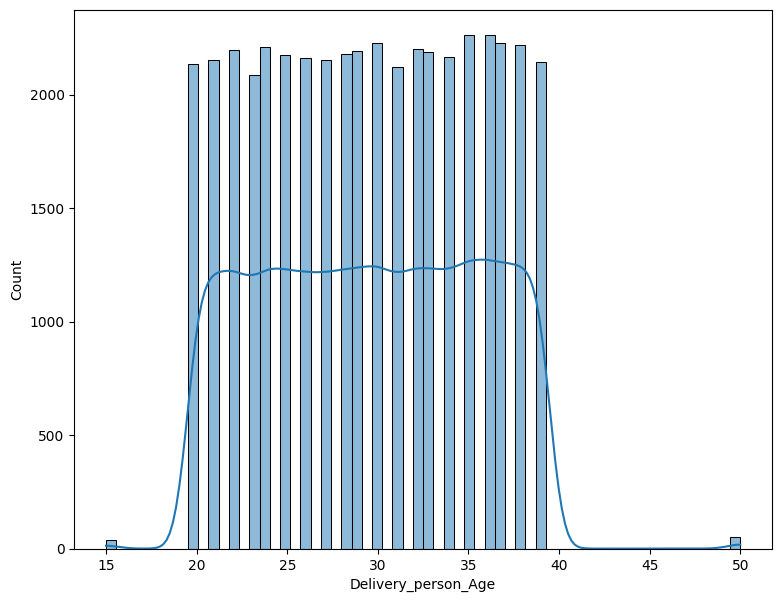

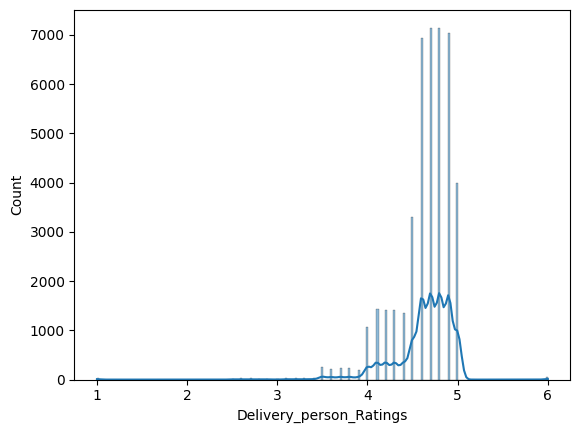

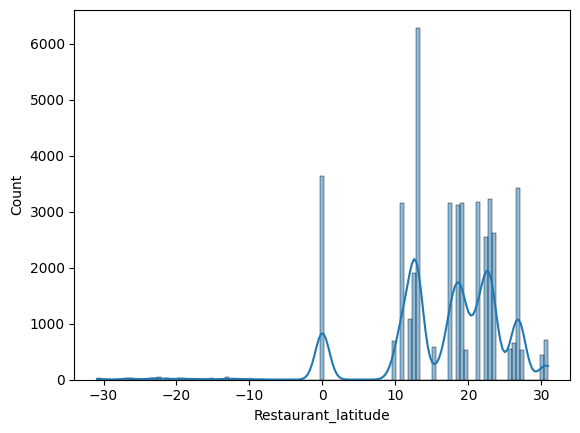

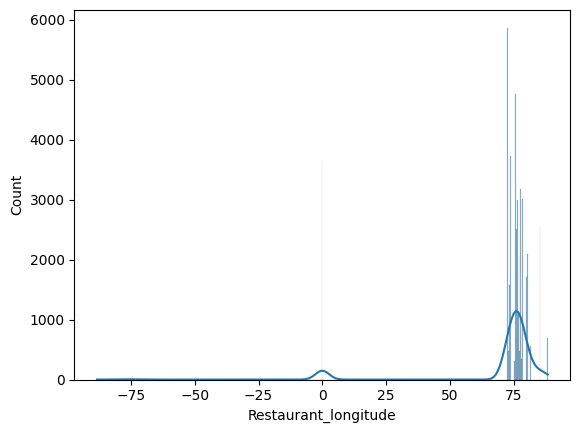

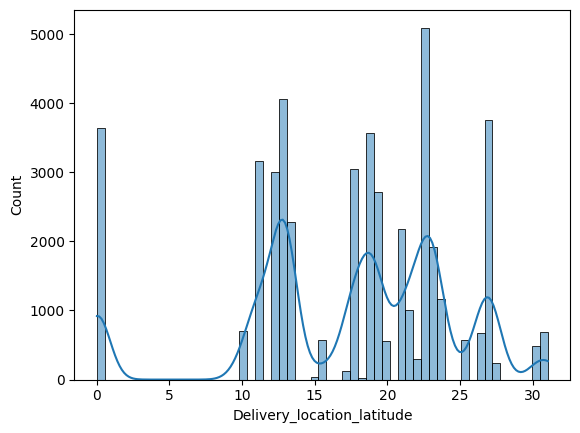

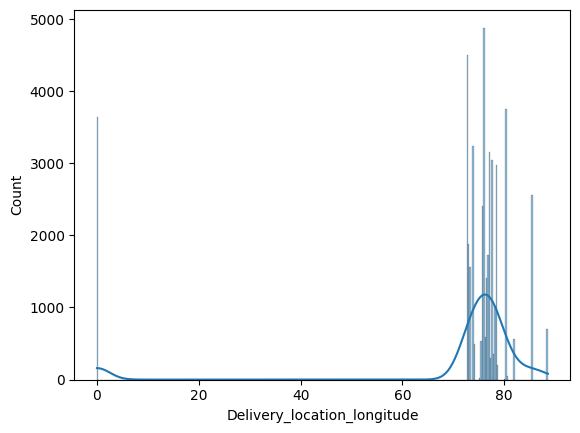

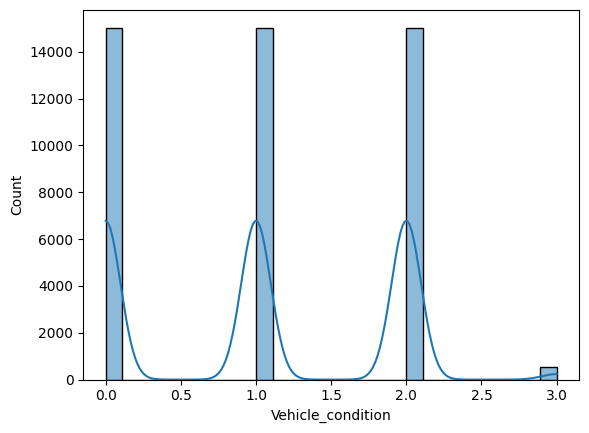

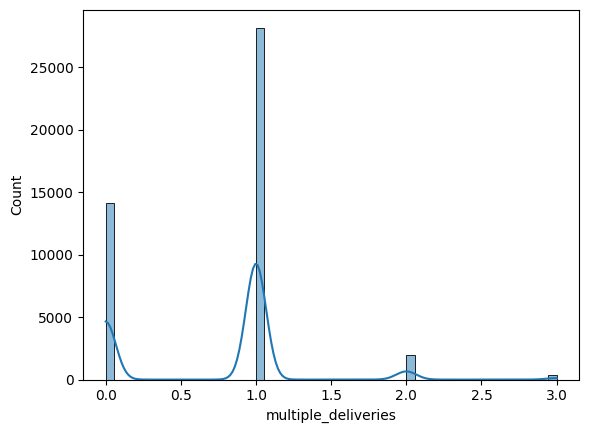

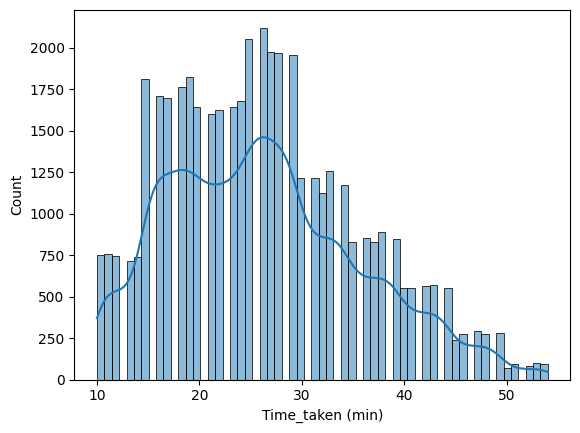

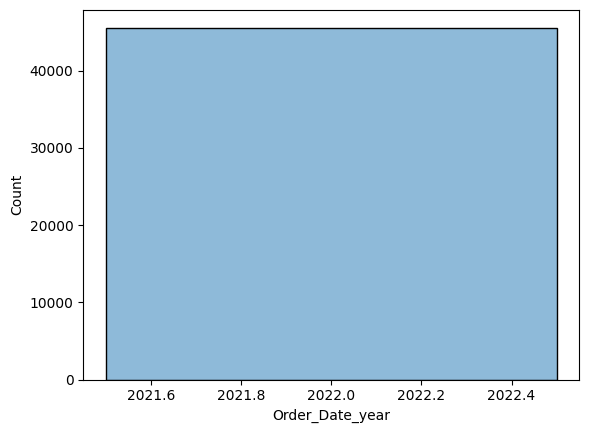

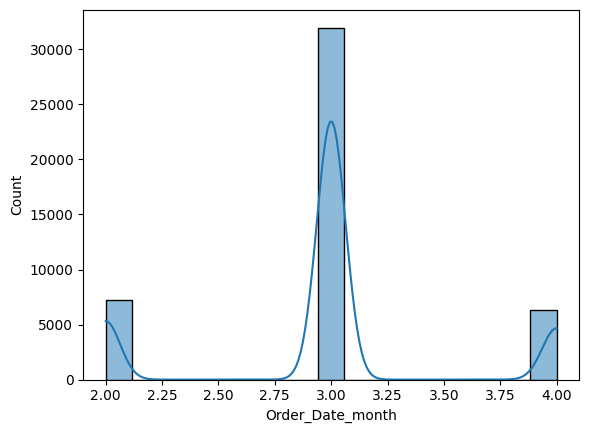

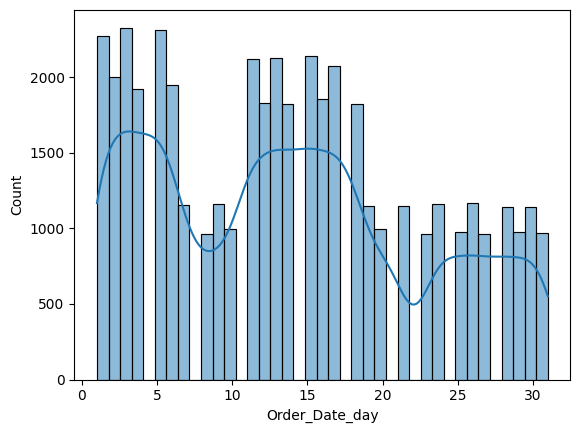

In [1358]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
x=1
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()


In [1359]:
### Corelation

<Axes: >

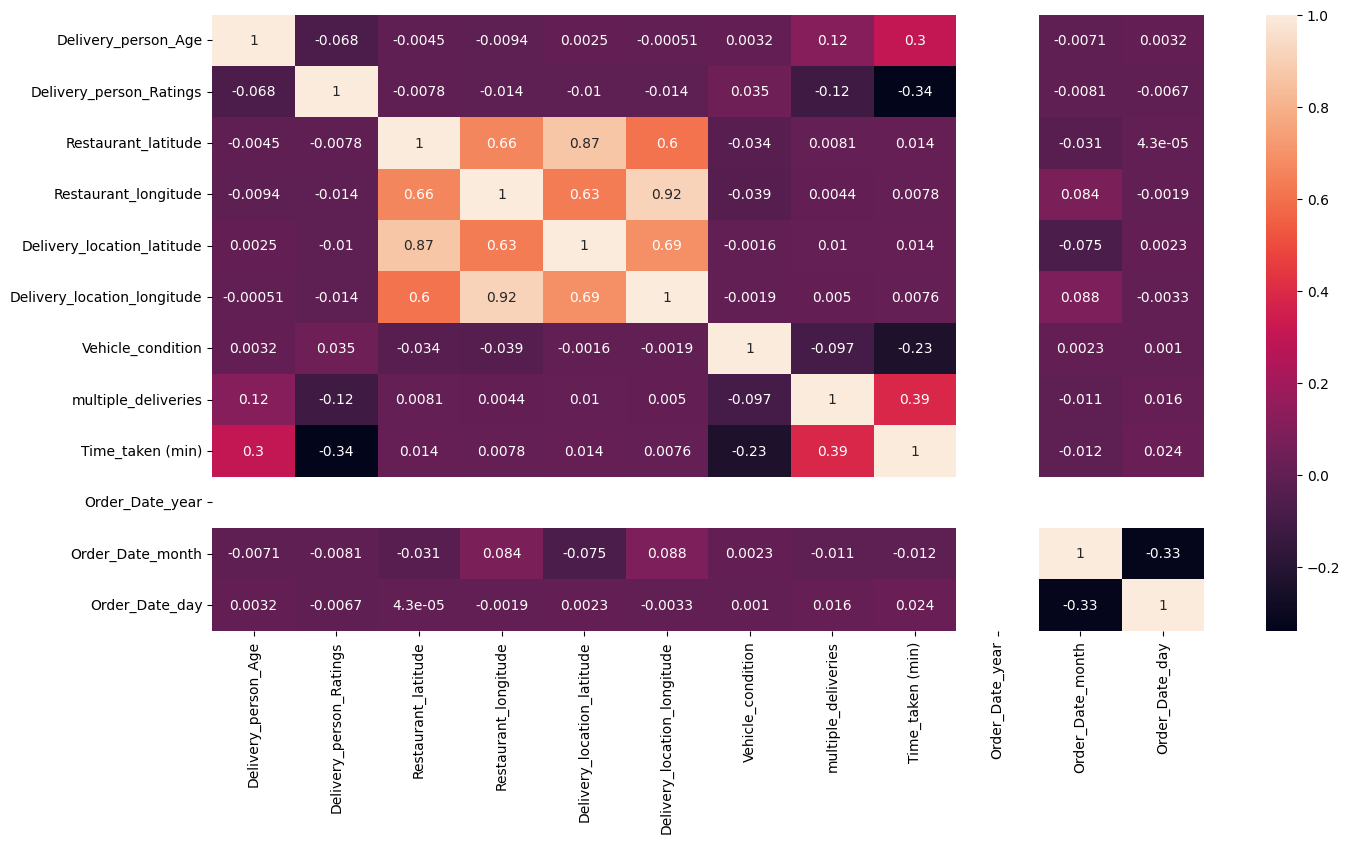

In [1360]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [1361]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken (min)                  0
Order_Date_year                   0
Order_Date_month                  0
Order_Date_day                    0
dtype: int64

In [1362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Time_Orderd                  45584 non-null  object 
 7   Time_Order_picked            45584 non-null  object 
 8   Weather_conditions           45584 non-null  object 
 9   Road_traffic_density         45584 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [1363]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_year,Order_Date_month,Order_Date_day
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [1364]:
df['Time_Orderd']= pd.to_datetime(df['Time_Orderd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Time_Orderd                  45584 non-null  datetime64[ns]
 7   Time_Order_picked            45584 non-null  object        
 8   Weather_conditions           45584 non-null  object        
 9   Road_traffic_density         45584 non-null  object        
 10  Vehicle_condition            45584 non-null  int64         
 11  Type_of_order                45584 non-nu

C:\Users\dns\AppData\Local\Temp\ipykernel_33788\905537497.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd']= pd.to_datetime(df['Time_Orderd'])


In [1365]:
df['Time_Orderd_hour'] = df['Time_Orderd'].dt.hour
df['Time_Orderd_minute'] = df['Time_Orderd'].dt.minute

In [1366]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_year,Order_Date_month,Order_Date_day,Time_Orderd_hour,Time_Orderd_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2023-05-20 21:55:00,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2023-05-20 14:55:00,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2023-05-20 17:30:00,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2023-05-20 09:20:00,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2023-05-20 19:50:00,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [1367]:
df['Time_Order_picked']= pd.to_datetime(df['Time_Order_picked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Time_Orderd                  45584 non-null  datetime64[ns]
 7   Time_Order_picked            45584 non-null  datetime64[ns]
 8   Weather_conditions           45584 non-null  object        
 9   Road_traffic_density         45584 non-null  object        
 10  Vehicle_condition            45584 non-null  int64         
 11  Type_of_order                45584 non-nu

C:\Users\dns\AppData\Local\Temp\ipykernel_33788\1526846712.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked']= pd.to_datetime(df['Time_Order_picked'])


In [1368]:
df['Time_Order_picked_hour'] = df['Time_Order_picked'].dt.hour
df['Time_Order_picked_minute'] = df['Time_Order_picked'].dt.minute

In [1369]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_year,Order_Date_month,Order_Date_day,Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2023-05-20 21:55:00,2023-05-20 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2023-05-20 14:55:00,2023-05-20 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55,15,5
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2023-05-20 17:30:00,2023-05-20 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2023-05-20 09:20:00,2023-05-20 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20,9,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2023-05-20 19:50:00,2023-05-20 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50,20,5


In [1370]:
df.drop(columns=['Time_Orderd', 'Time_Order_picked'], axis=1, inplace=True)

In [1371]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Date_year,Order_Date_month,Order_Date_day,Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55,15,5
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20,9,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50,20,5


In [1372]:
for i in df['Type_of_vehicle']:
    if type(i)==float:
        print('wow')
    elif type(i)==int:
        print('yes')
    else:
        pass

In [1373]:
df.drop(columns=['Order_Date_year','Order_Date_month', 'Order_Date_day'], axis=1, inplace=True)

In [1374]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

### Model Training

In [1375]:
X = df.drop(columns=['Time_taken (min)'], axis=1)
y=df['Time_taken (min)']

In [1376]:
#Define which columns should be ordinal-encoded and which should be scaled
categories_cols = X.select_dtypes(include='object').columns
numericals_cols = X.select_dtypes(exclude='object').columns

In [1377]:
X['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [1378]:
#Define te custom ranking for each ordinal variable
Weather_conditions_categories = ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', 'unknown']
Road_traffic_density_categories = ['Jam', 'High', 'Medium', 'Low', 'unknown']
Type_of_order_categories = ['Snack', 'Meal', 'Drinks', 'Buffet']
Type_of_vehicle_categories = ['scooter', 'motorcycle', 'electric_scooter', 'bicycle']
Festival_categories = ['No', 'Yes', 'unknown']
City_categories = ['Metropolitian', 'Urban', 'Semi-Urban', 'unknown']


In [1379]:
from sklearn.impute import SimpleImputer # Handling Missing values
from sklearn.preprocessing import RobustScaler # Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal encoding
## piplines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [1380]:
### Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]
)

# Categorical Pipeline
cat_pipeline=Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[Weather_conditions_categories, Road_traffic_density_categories, Type_of_order_categories, Type_of_vehicle_categories, Festival_categories, City_categories])),
        ('scaler', RobustScaler())
    ]
)

preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline, numericals_cols),
    ('cat_pipeline', cat_pipeline, categories_cols)
])

In [1381]:
### Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)


In [1382]:
#'Cloudy', 'Fog', 'Sandstorms', 'Sunny', 'unknown', 'Windy', 'Stormy'

In [1383]:
X_train['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [1384]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [1385]:
X_train

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Time_Orderd_hour,num_pipeline__Time_Orderd_minute,num_pipeline__Time_Order_picked_hour,num_pipeline__Time_Order_picked_minute,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_order,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-0.615812,1.5,-0.563628,0.877525,-0.569343,0.871367,0.0,0.0,0.0,-0.666667,0.0,-0.333333,0.666667,0.000000,-0.5,0.0,0.0,0.0
1,0.606411,-2.0,-0.770320,0.223388,-0.772947,0.216905,-0.5,0.0,0.5,-0.333333,0.5,0.000000,-0.333333,0.333333,0.0,0.0,0.0,0.0
2,0.939744,-3.0,0.266038,-0.639990,0.264302,-0.653033,-0.5,-1.0,0.0,-0.666667,0.0,-0.500000,-0.333333,0.000000,1.0,0.0,0.0,0.0
3,-0.282478,1.0,-0.876969,0.081934,-0.872436,0.088543,0.0,0.0,-1.8,-1.000000,0.0,-0.500000,0.000000,0.000000,-0.5,-1.0,0.0,0.0
4,-1.060256,0.0,-0.769440,0.216557,-0.769004,0.216223,-0.5,-1.0,0.1,0.833333,-1.8,-1.000000,0.333333,-0.666667,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36462,-0.171367,1.0,-1.893535,-15.571594,-1.900104,-15.744302,0.5,0.0,-0.8,-0.333333,-0.8,0.000000,0.666667,0.333333,0.5,-1.0,0.0,0.0
36463,-0.060256,1.0,0.267880,-0.637439,0.262060,-0.658746,0.5,0.0,0.4,0.500000,-1.8,-1.000000,0.666667,0.333333,0.5,0.0,0.0,0.0
36464,-0.615812,-2.0,0.000759,-0.430690,-0.002985,-0.445784,-0.5,-1.0,0.4,-0.166667,0.4,0.166667,0.000000,0.333333,0.0,0.0,0.0,0.0
36465,-0.282478,-1.5,0.056795,-0.625897,0.055085,-0.638799,-0.5,0.0,-0.1,0.000000,-0.1,0.166667,-0.666667,0.000000,1.0,0.0,0.0,0.0


In [1386]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36467 entries, 0 to 36466
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num_pipeline__Delivery_person_Age          36467 non-null  float64
 1   num_pipeline__Delivery_person_Ratings      36467 non-null  float64
 2   num_pipeline__Restaurant_latitude          36467 non-null  float64
 3   num_pipeline__Restaurant_longitude         36467 non-null  float64
 4   num_pipeline__Delivery_location_latitude   36467 non-null  float64
 5   num_pipeline__Delivery_location_longitude  36467 non-null  float64
 6   num_pipeline__Vehicle_condition            36467 non-null  float64
 7   num_pipeline__multiple_deliveries          36467 non-null  float64
 8   num_pipeline__Time_Orderd_hour             36467 non-null  float64
 9   num_pipeline__Time_Orderd_minute           36467 non-null  float64
 10  num_pipeline__Time_Ord

In [1387]:
X_train.isnull().sum()

num_pipeline__Delivery_person_Age            0
num_pipeline__Delivery_person_Ratings        0
num_pipeline__Restaurant_latitude            0
num_pipeline__Restaurant_longitude           0
num_pipeline__Delivery_location_latitude     0
num_pipeline__Delivery_location_longitude    0
num_pipeline__Vehicle_condition              0
num_pipeline__multiple_deliveries            0
num_pipeline__Time_Orderd_hour               0
num_pipeline__Time_Orderd_minute             0
num_pipeline__Time_Order_picked_hour         0
num_pipeline__Time_Order_picked_minute       0
cat_pipeline__Weather_conditions             0
cat_pipeline__Road_traffic_density           0
cat_pipeline__Type_of_order                  0
cat_pipeline__Type_of_vehicle                0
cat_pipeline__Festival                       0
cat_pipeline__City                           0
dtype: int64

In [1388]:
X_train.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Time_Orderd_hour,num_pipeline__Time_Orderd_minute,num_pipeline__Time_Order_picked_hour,num_pipeline__Time_Order_picked_minute,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_order,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-0.615812,1.5,-0.563628,0.877525,-0.569343,0.871367,0.0,0.0,0.0,-0.666667,0.0,-0.333333,0.666667,0.000000,-0.5,0.0,0.0,0.0
1,0.606411,-2.0,-0.770320,0.223388,-0.772947,0.216905,-0.5,0.0,0.5,-0.333333,0.5,0.000000,-0.333333,0.333333,0.0,0.0,0.0,0.0
2,0.939744,-3.0,0.266038,-0.639990,0.264302,-0.653033,-0.5,-1.0,0.0,-0.666667,0.0,-0.500000,-0.333333,0.000000,1.0,0.0,0.0,0.0
3,-0.282478,1.0,-0.876969,0.081934,-0.872436,0.088543,0.0,0.0,-1.8,-1.000000,0.0,-0.500000,0.000000,0.000000,-0.5,-1.0,0.0,0.0
4,-1.060256,0.0,-0.769440,0.216557,-0.769004,0.216223,-0.5,-1.0,0.1,0.833333,-1.8,-1.000000,0.333333,-0.666667,1.0,0.0,1.0,3.0


In [1389]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [1390]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [1391]:
regression.coef_

array([ 3.60603143, -1.4438536 , -0.11959191, -0.20576731,  0.15349032,
        0.19350263, -4.04294349,  3.93008305,  0.20092478, -0.20765789,
        0.6119287 , -0.39802223, -1.52312672, -7.33914069, -0.08096303,
        0.69046906,  3.68252325, -1.44361718])

In [1392]:
regression.intercept_

26.433471976123748

In [1393]:
import numpy as np
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true, predicted)
    return mae, rmse, r2_square

In [1394]:
# Train multiple models

models={
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    #make prediction
    y_pred=model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')



LinearRegression
Model Training Performance
RMSE: 6.87350842752368
MAE: 5.415814517688539
R2 score 46.44054450403529


Lasso
Model Training Performance
RMSE: 7.856358382312002
MAE: 6.221385985548859
R2 score 30.02840287337203


Ridge
Model Training Performance
RMSE: 6.873485931832079
MAE: 5.415821789628507
R2 score 46.440895083374556


ElasticNet
Model Training Performance
RMSE: 8.061694204075573
MAE: 6.403532910902364
R2 score 26.323013344430436




In [1395]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet']

In [1396]:
r2_list

[0.46440544504035286,
 0.3002840287337203,
 0.46440895083374556,
 0.26323013344430435]